# Лабораторная работа №4

>Вариант: 9
> [Датасет про диабет](https://www.kaggle.com/datasets/abdallamahgoub/diabetes/data)

Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from itertools import combinations

pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для начала загрузим датасет и выведем его

In [ ]:
file_id = "15vitm5WHBI-qP3TQn0KtFz6gyyHZC8Cj"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Рассчитаем основные статистические показатели по данным

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

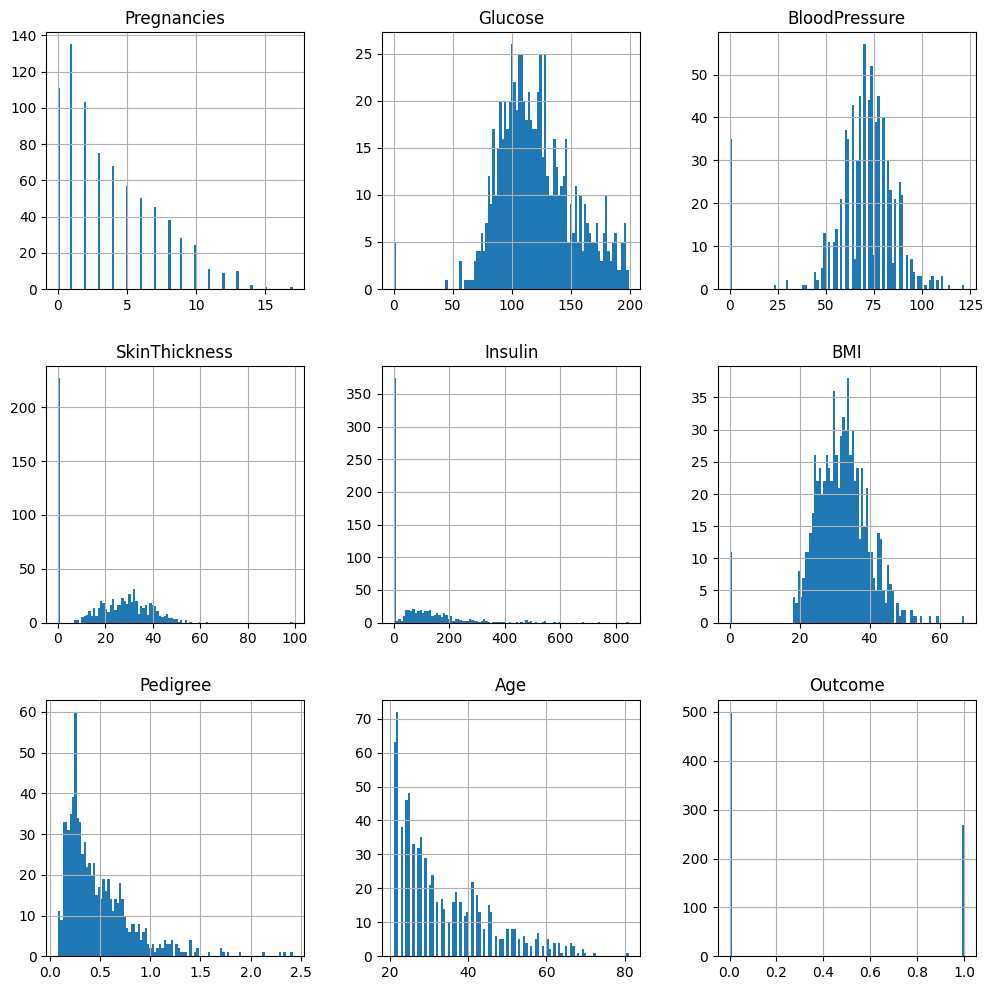

In [ ]:
df.hist(bins=100, figsize=(12, 12))

Заменим отсутсвующие значения. Явный nan тут нет, однако для признаков `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` нули равносильны пропускам. Удалим эти значения.

In [ ]:
cols_zero_as_nan = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_zero_as_nan] = df[cols_zero_as_nan].replace(0, np.nan)
df = df.dropna()

Повторим вывод графиков и статистики чтобы убедится в том что нули устранены

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Pedigree'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

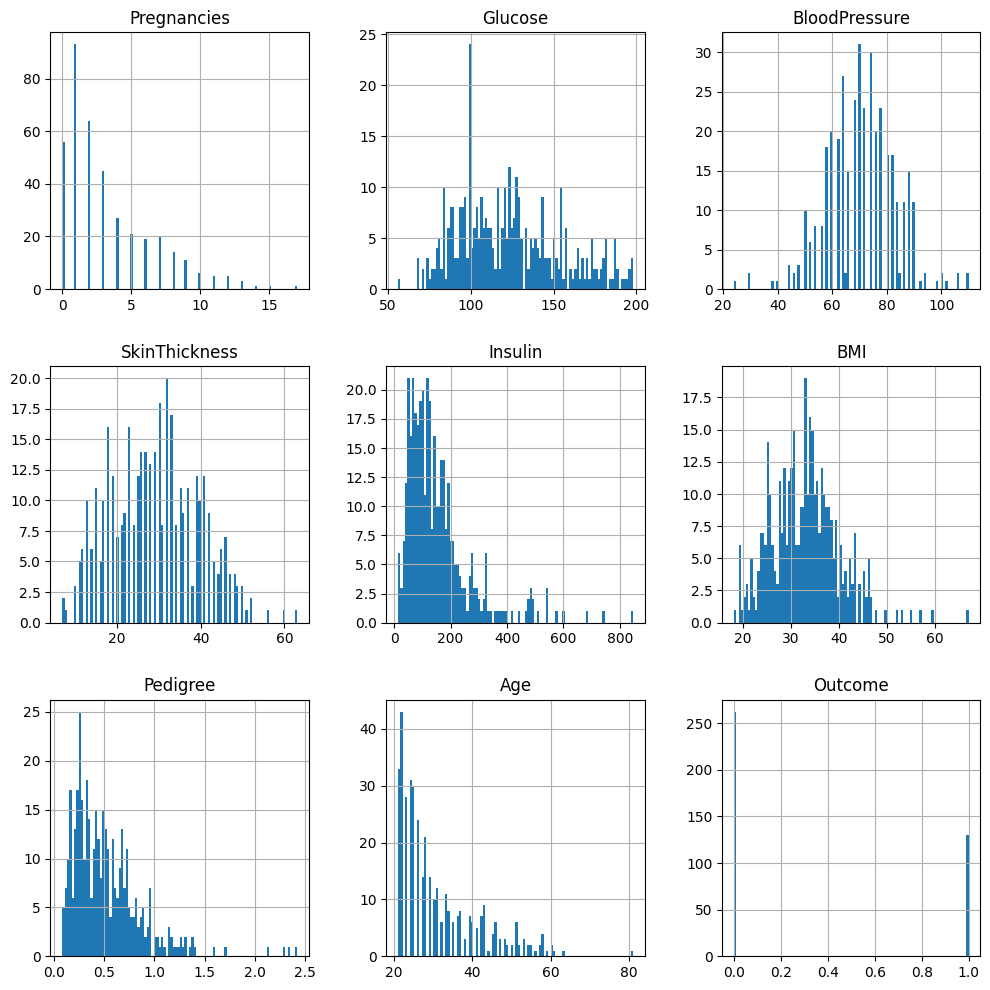

In [ ]:
df.hist(bins=100, figsize=(12, 12))

Теперь построим box-plot чтобы проанализировать датасет на выбросы

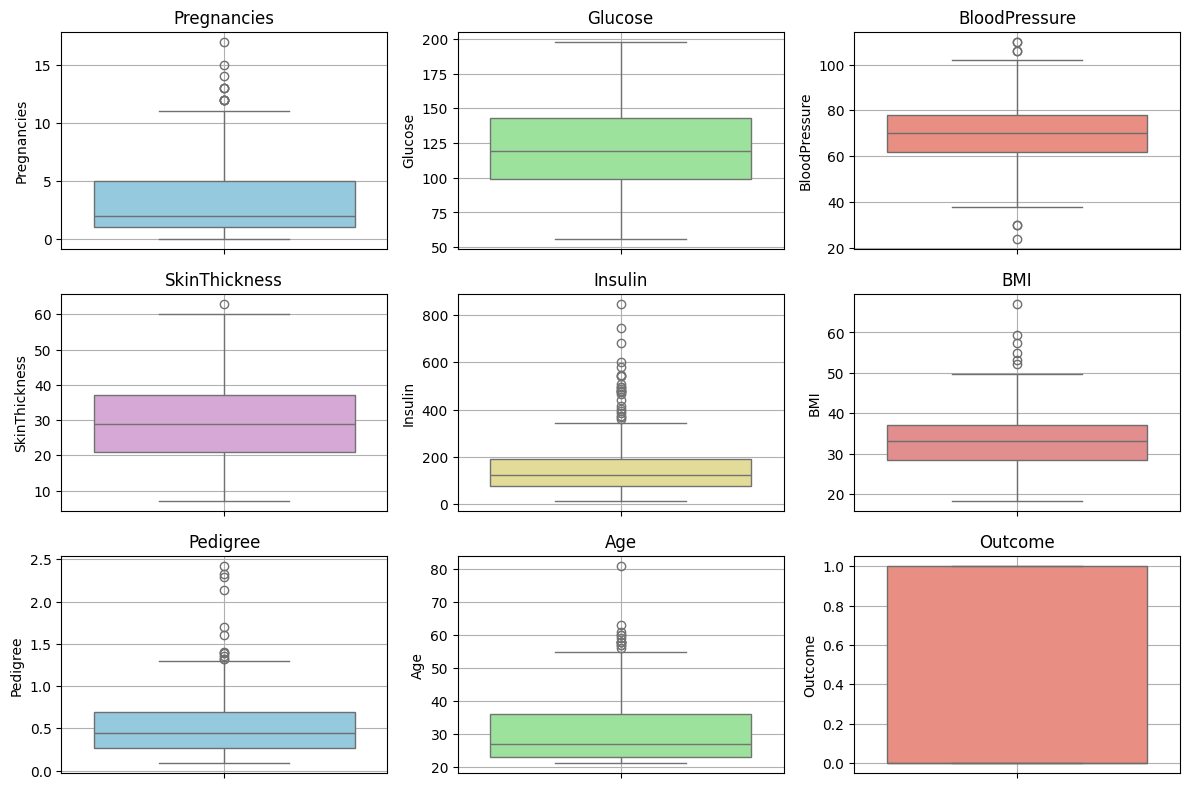

In [ ]:
num_cols = len(df.columns)
cols_per_row = 3

fig, axes = plt.subplots(3, cols_per_row, figsize=(12, 8))
axes = axes.flatten() if num_cols > 1 else [axes]

colors = ["skyblue", "lightgreen", "salmon", "plum", "khaki", "lightcoral"]

for i, col in enumerate(list(df.columns)):
    sns.boxplot(y=df[col], ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Видны выбросы, но не ограничиваем их так как это может сделать данные невалидными

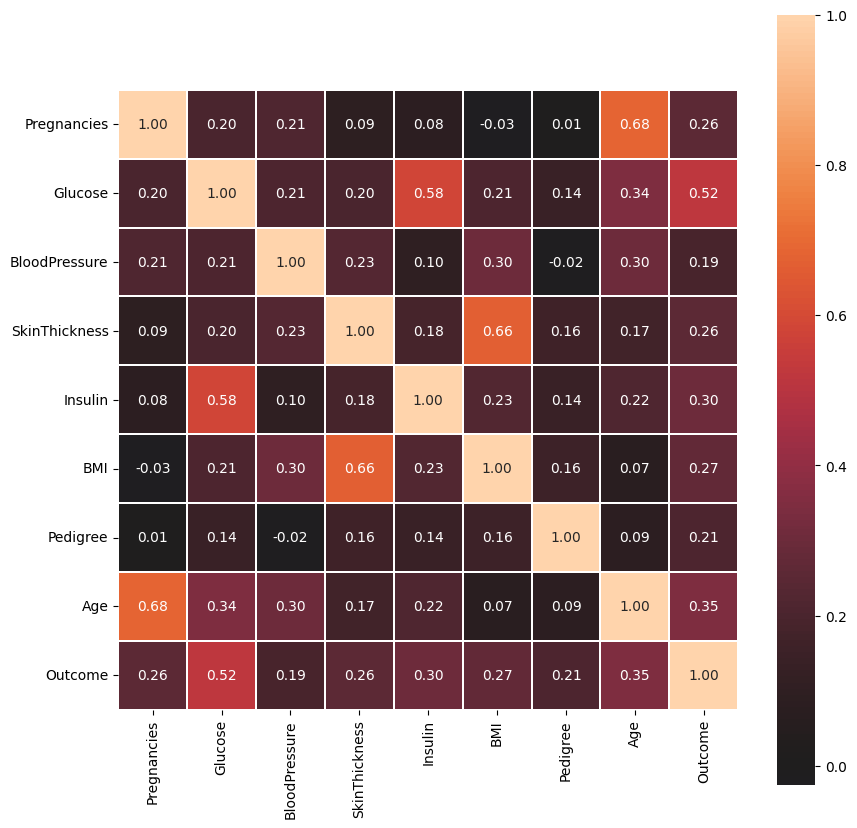

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", center=0,
            square=True, linewidths=0.1)
plt.show()

Теперь нормализуем данные с помощью min-max нормализации:

$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In [ ]:
n_df = df.copy()

for col in df:
    min_v = df[col].min()
    max_v = df[col].max()
    if min_v == max_v:
        continue
    n_df[col] = (df[col] - min_v) / (max_v - min_v)

n_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
3,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000,0.0
4,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,1.0
6,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,1.0
8,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,1.0
13,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333,1.0
...,...,...,...,...,...,...,...,...,...
753,0.000000,0.880282,0.744186,0.660714,0.596154,0.513292,0.058672,0.083333,1.0
755,0.058824,0.507042,0.744186,0.571429,0.115385,0.374233,0.416274,0.266667,1.0
760,0.117647,0.225352,0.395349,0.339286,0.002404,0.208589,0.291649,0.016667,0.0
763,0.588235,0.316901,0.604651,0.732143,0.199519,0.300613,0.036831,0.700000,0.0


Построим 3d визуализацию признаков

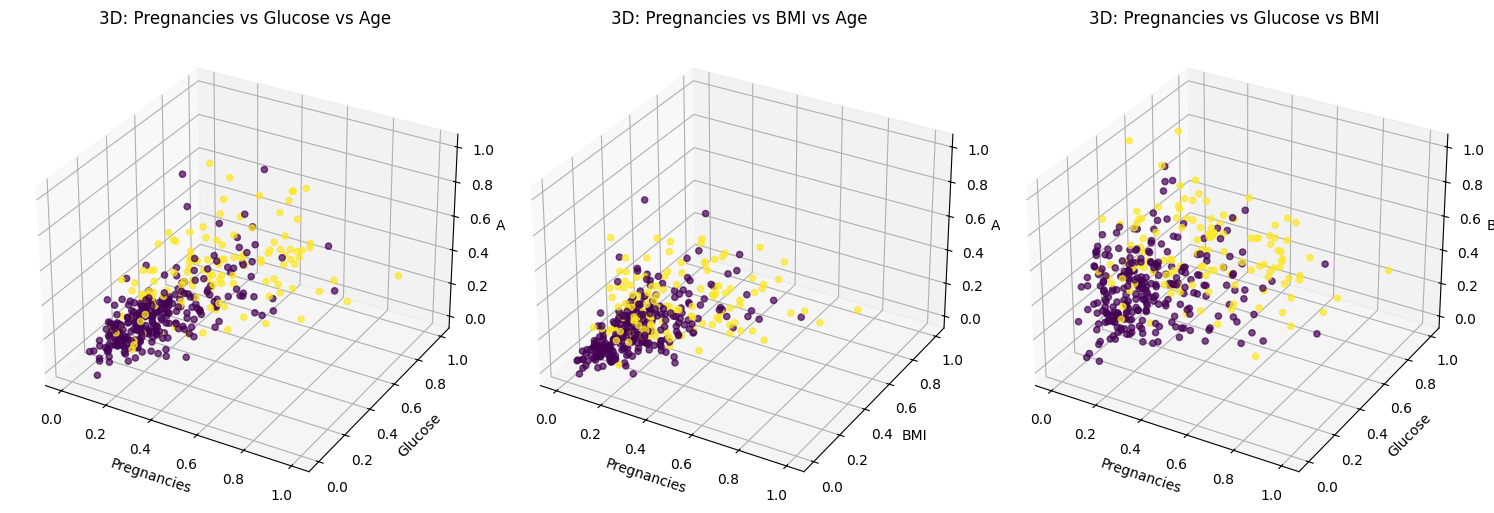

In [ ]:
def plot_3d(features_combinations, df, target_col):
  subplot_cols = 3
  num_combinations = len(features_combinations)
  subplot_rows = (num_combinations + subplot_cols - 1) // subplot_cols

  fig = plt.figure(figsize=(subplot_cols * 5, subplot_rows * 5))

  for i, combo in enumerate(features_combinations):
      X_subset = df[list(combo)].values
      y_values = df['Outcome'].values

      ax = fig.add_subplot(subplot_rows, subplot_cols, i + 1, projection="3d")

      scatter = ax.scatter(X_subset[:, 0], X_subset[:, 1], X_subset[:, 2], c=y_values, alpha=0.7)
      ax.set_xlabel(combo[0])
      ax.set_ylabel(combo[1])
      ax.set_zlabel(combo[2])
      ax.set_title(f"3D: {combo[0]} vs {combo[1]} vs {combo[2]}")

  for j in range(i + 1, subplot_rows * subplot_cols):
      fig.delaxes(fig.axes[j])

  plt.tight_layout()
  plt.show()

feat_comb = [
    ['Pregnancies', 'Glucose', 'Age'],
    ['Pregnancies', 'BMI', 'Age'],
    ['Pregnancies', 'Glucose', 'BMI']
]

plot_3d(feat_comb, n_df, 'Outcome')

Выделим из общего массива данных матрицу признаков и целевую колонку

In [ ]:
X = n_df.drop('Outcome', axis=1)
Y = n_df['Outcome']

Реализуем функцию для разделения данных на тренировочную и тестовую выборки

In [ ]:
def train_test_split(X, Y, seed=42, test_percent=0.2):
  random.seed(seed)
  random.shuffle(list(range(len(X))))

  test_size = int(len(X) * test_percent)

  x_train = X[test_size:]
  x_test = X[:test_size]
  y_train = Y[test_size:]
  y_test = Y[:test_size]

  return x_train, x_test, y_train, y_test

Реализуем метод k ближайших соседей

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(X, y, query_point, k):
  distances = [euclidean_distance(query_point, x) for x in X]

  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y[i] for i in k_indices]
  most_common = np.bincount(k_nearest_labels).argmax()

  return most_common

Также определим вспомогательные функции для оценки качества модели. Будем использовать матрицу ошибок. Также определим стандартную accuracy метрику.

In [ ]:
def error_matrix(y_pred, y_test, n):
    res = np.zeros((n, n))
    for pred, true in zip(y_pred, y_test):
        res[int(pred), int(true)] += 1
    return res

def accuracy_score(y_pred, y_test):
    correct_predictions = np.sum(y_test == y_pred)
    total_predictions = len(y_test)
    return correct_predictions / total_predictions

Также введём вспомогательную функцию для тренировки модели на определенных колонках таблицы и вывода матрицы ошибок

In [ ]:
def explore(X, Y, k_vals):
  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  cols = 3
  rows = (len(k_vals) + cols - 1) // cols
  fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
  axes = axes.flatten() if len(k_vals) > 1 else [axes]


  for i, k in enumerate(k_vals):
    y_pred = [k_nearest_neighbors(x_train.values, y_train.values, x, k) for x in x_test.values]
    erm = error_matrix(y_pred, y_test, 2)
    acc = accuracy_score(y_pred, y_test)
    print(f'K = {k}\nAccuracy: {acc}\n')

    ax = axes[i]
    im = ax.matshow(erm, cmap='Blues')
    ax.set_xlabel('True class')
    ax.set_ylabel('Predicted class')
    ax.set_title(f'Confusion Matrix (K={k})')
    for (i, j), z in np.ndenumerate(erm):
        ax.text(j, i, str(int(z)), ha='center', va='center')

  plt.tight_layout()
  plt.show()

Исследуем Модель 1: на случайных признаках

,Glucose,Pregnancies,BMI,BloodPressure,Age,Pedigree,Insulin
3,0.232394,0.058824,0.202454,0.488372,0.000000,0.035118,0.096154
4,0.570423,0.000000,0.509202,0.186047,0.200000,0.943469,0.185096
6,0.154930,0.176471,0.261759,0.302326,0.083333,0.069807,0.088942
8,0.992958,0.117647,0.251534,0.534884,0.533333,0.031263,0.635817
13,0.936620,0.058824,0.243354,0.418605,0.633333,0.134047,1.000000


K = 3
Accuracy: 0.7692307692307693

K = 5
Accuracy: 0.8076923076923077

K = 10
Accuracy: 0.7692307692307693

K = 30
Accuracy: 0.8205128205128205

K = 50
Accuracy: 0.782051282051282

K = 70
Accuracy: 0.7948717948717948

K = 100
Accuracy: 0.7564102564102564

K = 150
Accuracy: 0.717948717948718

K = 200
Accuracy: 0.6410256410256411



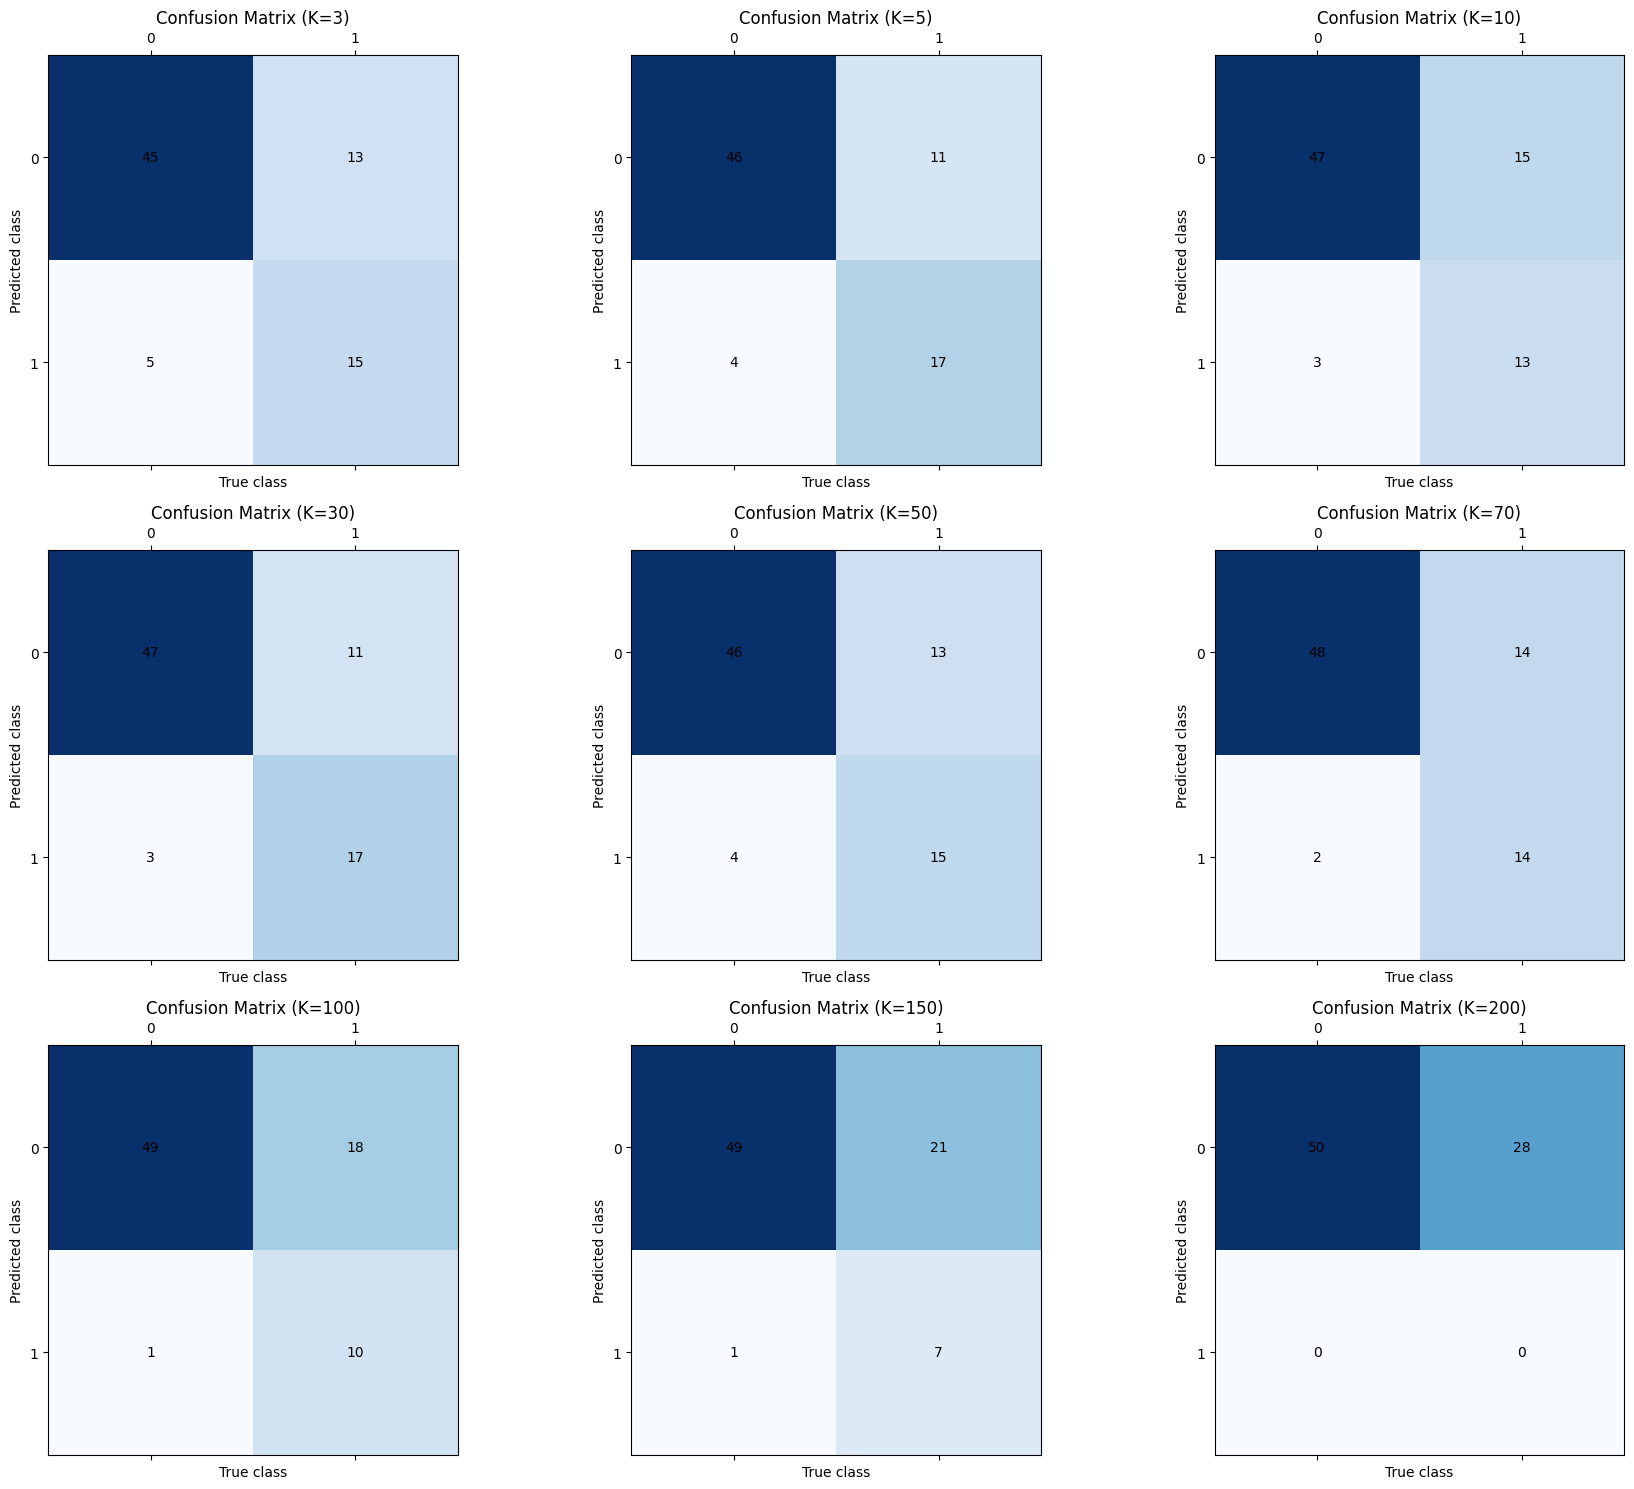

In [ ]:
random.seed(42)

selected_features = random.sample(list(X.columns), random.randint(2, len(X.columns)))

new_x = X[selected_features]

display(new_x.head())

explore(new_x, Y, [3, 5, 10, 30, 50, 70, 100, 150, 200])

Исследуем модель 2: на фиксированном наборе признаков

K = 3
Accuracy: 0.782051282051282

K = 5
Accuracy: 0.8076923076923077

K = 10
Accuracy: 0.8461538461538461

K = 30
Accuracy: 0.8589743589743589

K = 50
Accuracy: 0.8205128205128205

K = 70
Accuracy: 0.7948717948717948

K = 100
Accuracy: 0.7564102564102564

K = 150
Accuracy: 0.7435897435897436

K = 200
Accuracy: 0.6410256410256411



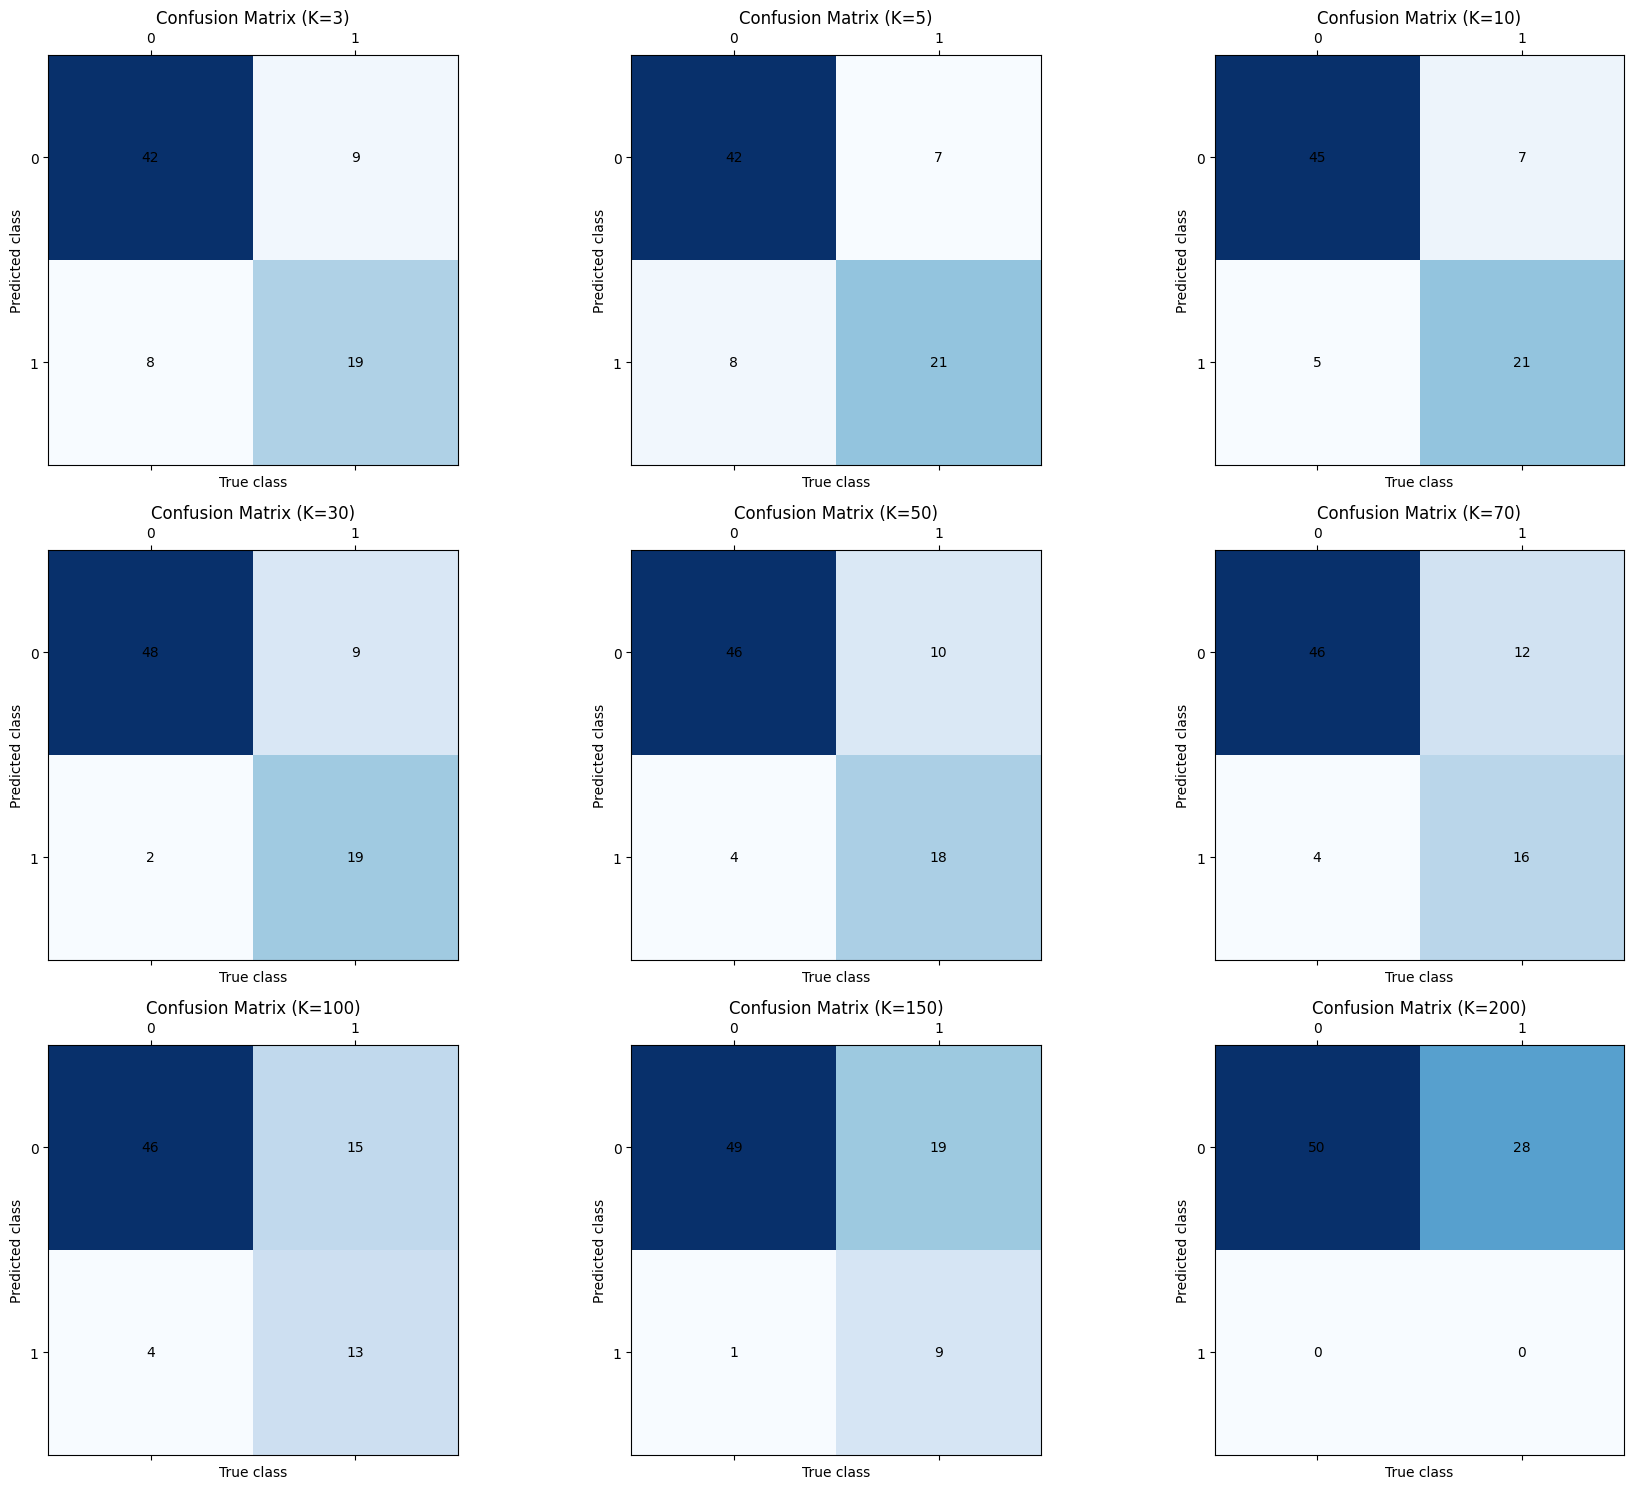

In [ ]:
explore(X[['Pregnancies', 'Glucose', 'Age']], Y, [3, 5, 10, 30, 50, 70, 100, 150, 200])

Я также написал функцию которая перебирает различные наборы признаков при различных k в поисках наилучшей точности.

In [ ]:
def find_best_params(X, Y, k_vals):
  best_accuracy = 0
  best_feature_subset = []
  best_matrix=[]

  x_train, x_test, y_train, y_test = train_test_split(X, Y)

  for subset_size in range(2, len(X.columns) + 1):
    for subset in combinations(X.columns, subset_size):
      selected_features = list(subset)

      X_train_subset = x_train[selected_features].values
      X_test_subset = x_test[selected_features].values

      for k in k_vals:
        y_pred = [k_nearest_neighbors(X_train_subset, y_train.values, x, k) for x in X_test_subset]

        current_accuracy = accuracy_score(y_test.values, y_pred)

        if current_accuracy > best_accuracy:
          best_accuracy = current_accuracy
          best_feature_subset = selected_features.copy()
          best_k = k
          best_matrix = error_matrix(y_pred, y_test.values, 2)

  return best_accuracy, best_feature_subset, best_k, best_matrix

Запустим поиск лучшего набора параметров

In [ ]:
best_accuracy, best_feature_subset, best_k, best_matrix = find_best_params(X, Y, [3, 5, 10, 30, 50, 70, 100, 150, 200])

print(f"Лучший набор признаков: {best_feature_subset}")
print(f"Лучшее значение k: {best_k}")
print(f"Лучшая точность: {best_accuracy:.4f}")
print(f"Матрица ошибок для лучшей комбинации:\n{best_matrix}")

Лучший набор признаков: ['Pregnancies', 'Glucose', 'Age']
Лучшее значение k: 30
Лучшая точность: 0.8590
Матрица ошибок для лучшей комбинации:
[[48.  9.]
 [ 2. 19.]]


Получаем что наилучшая точность для заданных $k$ достигается при $k=30$ и использовании признаков: `['Pregnancies', 'Glucose', 'Age']`.